In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json
import os
import time


# Gathering Data

## Download CSV file

In [2]:
#gathering after downloading manually
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Gathering Programmatically

In [4]:
#gathering image URLs programatically
folder_name = 'image-predictions'

#creating a folder
if not os.path.exists(folder_name):
    os.makedirs(folder_name)


In [5]:
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
with open (os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
           file.write(response.content)

In [7]:
# to check if the file was successfully downloaded
os.listdir(folder_name)

['image-predictions.tsv']

In [8]:
df_image = pd.read_csv('image-predictions/image-predictions.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Twitter API


In [9]:

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'



In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [11]:
df_tweet_ids = df_archive['tweet_id']
len(df_tweet_ids)

2356

In [ ]:
# creating a list for needed unfo from Json file and also a separate list for tweets with exceptions/errors 
tweets_error_list = []

# List of tweets
df_tweets = []

# start time of execution
start = time.time()

# extract info we need from Json file through pandas loop function. 
for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json
        
        favorites = tweet['favorite_count'] # number of tweet favorites
        retweets = tweet['retweet_count'] # number of retweets
        date_time = tweet['created_at'] # time and date of tweet creation
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as exp:
        print(str(tweet_id)+ " _ " + str(exp))
        tweets_error_list.append(tweet_id)
        
# end time for excution
end = time.time()

#printing time for execution
print("Total time:", end - start)

In [ ]:
# total tweets received from api
print("The lengh of the result", len(df_tweets))

# The tweet_id of the errors received from api
print("The lengh of the errors", len(tweets_error_list))

In [ ]:

# converting our selected lists to Pandas Data Frame
df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets', 'date_time'])
# saving the dataFrame to txt file
df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [12]:
# test if DF is successfully created
df_api = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [13]:
df_api.head()

,tweet_id,favorites,retweets,date_time
0,892420643555336193,35151,7427,2017-08-01 16:23:56+00:00
1,892177421306343426,30431,5519,2017-08-01 00:17:27+00:00
2,891815181378084864,22890,3645,2017-07-31 00:18:03+00:00
3,891689557279858688,38424,7589,2017-07-30 15:58:51+00:00
4,891327558926688256,36694,8179,2017-07-29 16:00:24+00:00


In [14]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   int64 
 1   favorites  2331 non-null   int64 
 2   retweets   2331 non-null   int64 
 3   date_time  2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


# Assessing Data

8 quality issues and 2 tidiness

There are three tables:
    
    1- df_archive
    2- df_image
    3- df_api

# Summary of Assessment 

## Quality

### 'df_archive' table:

- source column is not readable and can be divided into 3 categories.
- rename column names to more understandable names,
- dog stage columns have None instead of np.Nan
- dog name column has None instead of np.Nan
- timestamp has erronous data type, object which has to be datetime
- dog_gender column can be created using the "text" column.


### ' df_image' table:

- first_predicted_breed column has inconsistent entries some with lower and some upper case.
- dog name has inconsistent entries some lower and some upercase names.
- duplicated columns have to be removed. 



 



## Tidiness

- three tables have to be merged into one table, join two tables to df_archive on tweet_id

- in df_archive, dog stages have to be merged under one column, they are one variable in three columns

- in df_archive, text column has extra bit of tweet URL which has to be removed.





In [15]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2290,667171260800061440,NaN,NaN,2015-11-19 02:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenneth. He likes Reese's Puffs. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667171260...,10,10,Kenneth,None,None,None,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5,10,None,None,None,pupper,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
1596,686286779679375361,NaN,NaN,2016-01-10 20:41:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",When bae calls your name from across the room....,NaN,NaN,NaN,https://vine.co/v/iMZx6aDbExn,12,10,None,None,None,None,None
926,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None
1973,673213039743795200,NaN,NaN,2015-12-05 18:51:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He just got some big news. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673213039...,10,10,Dexter,None,None,None,None
383,827199976799354881,NaN,NaN,2017-02-02 17:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wins every game of chess h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827199976...,13,10,Charlie,None,None,None,None
489,813910438903693312,NaN,NaN,2016-12-28 00:52:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chubbs. He dug a hole and now he's stu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813910438...,11,10,Chubbs,doggo,None,None,None
1761,678675843183484930,NaN,NaN,2015-12-20 20:38:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic pup here. Tail long af. Throat looks sw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678675843...,2,10,None,None,None,None,None
937,753298634498793472,NaN,NaN,2016-07-13 18:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carly. She's actually 2...,6.815232e+17,4.196984e+09,2015-12-28 17:12:42 +0000,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None


In [17]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [18]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
df_archive[df_archive['floofer'] == 'floofer']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None
1091,737445876994609152,NaN,NaN,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737445876...,13,10,None,None,floofer,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None


In [23]:
# to get full text
pd.options.display.max_colwidth
pd.options.display.max_colwidth = 144

In [24]:
df_archive[df_archive['floofer'].notnull()][['text', 'floofer']]

,text,floofer
0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None
1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 h...",None
2,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZn...,None
3,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,None
4,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek h...",None
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,None
2352,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,None
2353,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,None
2354,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,None


In [25]:
df_archive[df_archive['floofer'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [26]:
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [27]:
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://...,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/886366144734445568/photo/1,https://twitter.com/dog_rates/status/886366144734445568/photo/1",12,10,Roscoe,None,None,pupper,None
1185,718613305783398402,NaN,NaN,2016-04-09 01:35:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Carper. He's a Tortellini Angiosperm. In desperate need of a petting. 11/10 would hug softly https://t.co/lK9YDkRzPj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718613305783398402/photo/1,11,10,Carper,None,None,None,None
1172,720389942216527872,NaN,NaN,2016-04-13 23:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Ralphé. He patrols the lake. Looking for babes. 11/10 https://t.co/Pb6iMmo0wk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720389942216527872/photo/1,11,10,Ralphé,None,None,None,None
422,821813639212650496,NaN,NaN,2017-01-18 20:16:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Hercules. He can have whatever he wants for the rest of eternity. 12/10 would snug passionately https://t.co/mH0IOyFdIG,7.806013e+17,4.196984e+09,2016-09-27 02:53:48 +0000,"https://twitter.com/dog_rates/status/780601303617732608/photo/1,https://twitter.com/dog_rates/status/780601303617732608/photo/1",12,10,Hercules,None,None,None,None
1976,672995267319328768,NaN,NaN,2015-12-05 04:25:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pumpkin. He can look in two different directions at once. Great with a screwdriver. 8/10 https://t.co/odpuqtz2Fq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672995267319328768/photo/1,8,10,Pumpkin,None,None,None,None


In [28]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [29]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [30]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [32]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1174,737322739594330112,https://pbs.twimg.com/media/Cjt_Hm6WsAAjkPG.jpg,1,guinea_pig,0.148526,False,solar_dish,0.097183,False,park_bench,0.059312,False
787,690374419777196032,https://pbs.twimg.com/media/CZSz3vWXEAACElU.jpg,1,kuvasz,0.286345,True,Labrador_retriever,0.107144,True,ice_bear,0.085086,False
1034,711732680602345472,https://pbs.twimg.com/media/CeCVGEbUYAASeY4.jpg,3,dingo,0.366875,False,Ibizan_hound,0.334929,True,Eskimo_dog,0.073876,True
1196,740373189193256964,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
1319,756275833623502848,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,0.086276,True
406,673708611235921920,https://pbs.twimg.com/media/CVl-Z0dWcAAs7wr.jpg,1,golden_retriever,0.936333,True,cocker_spaniel,0.024211,True,Labrador_retriever,0.009435,True
192,669567591774625800,https://pbs.twimg.com/media/CUrIK1DWoAAhECq.jpg,1,Chihuahua,0.980511,True,toy_terrier,0.009166,True,miniature_pinscher,0.002659,True
288,671159727754231808,https://pbs.twimg.com/media/CVBwNjVWwAAlUFQ.jpg,1,pitcher,0.117446,False,sunglasses,0.062487,False,mask,0.059517,False
1837,837366284874571778,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1,American_Staffordshire_terrier,0.660085,True,Staffordshire_bullterrier,0.334947,True,dalmatian,0.002697,True
1317,755206590534418437,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,web_site,0.906673,False,printer,0.008600,False,carton,0.004533,False


In [33]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
df_api.head()

,tweet_id,favorites,retweets,date_time
0,892420643555336193,35151,7427,2017-08-01 16:23:56+00:00
1,892177421306343426,30431,5519,2017-08-01 00:17:27+00:00
2,891815181378084864,22890,3645,2017-07-31 00:18:03+00:00
3,891689557279858688,38424,7589,2017-07-30 15:58:51+00:00
4,891327558926688256,36694,8179,2017-07-29 16:00:24+00:00


In [35]:
df_api.sample(20)

,tweet_id,favorites,retweets,date_time
234,846139713627017216,29938,9616,2017-03-26 23:20:02+00:00
586,798585098161549313,0,5615,2016-11-15 17:54:59+00:00
607,795400264262053889,9931,2829,2016-11-06 22:59:35+00:00
1422,696490539101908992,1174,138,2016-02-08 00:27:39+00:00
2292,666644823164719104,218,73,2015-11-17 15:51:26+00:00
249,842846295480000512,14819,3482,2017-03-17 21:13:10+00:00
1835,675489971617296384,1212,557,2015-12-12 01:38:53+00:00
306,834458053273591808,9396,1622,2017-02-22 17:41:18+00:00
2260,667188689915760640,683,363,2015-11-19 03:52:34+00:00
2013,671550332464455680,843,194,2015-12-01 04:44:10+00:00


In [36]:
df_api.favorites.value_counts()

0        163
2012       3
1027       3
1202       3
3118       3
        ... 
72266      1
2636       1
2640       1
2642       1
607        1
Name: favorites, Length: 1991, dtype: int64

In [37]:
df_api[df_api.retweets == 0]

,tweet_id,favorites,retweets,date_time


In [38]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   int64 
 1   favorites  2331 non-null   int64 
 2   retweets   2331 non-null   int64 
 3   date_time  2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


Cleaning data

# Cleaning Data

In [39]:
# first step of cleaning is to make copy of tables. 
df_archive_copy = df_archive.copy()
df_image_copy =df_image.copy()
df_api_copy = df_api.copy()

In [40]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# Tidiness Issues

# Define

three tables have to be merged into one table, join to df_archive on tweet_id using merge method twice.

## Code

In [41]:

df_master = pd.merge(left=df_archive_copy,
                                 right=df_image_copy, left_on='tweet_id', right_on='tweet_id', how='inner')

In [42]:
df_master = df_master.merge(df_api,
                                 on='tweet_id', how='inner')

# test

In [43]:
df_master.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,date_time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.07611,False,35151,7427,2017-08-01 16:23:56+00:00


In [44]:
df_master.drop(columns=['in_reply_to_status_id','in_reply_to_user_id', 'img_num',
                        'retweeted_status_id', 'retweeted_status_user_id', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
                        'retweeted_status_timestamp', 'date_time'], inplace=True) 
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,p1,p1_conf,p1_dog,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,35151,7427
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 h...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,30431,5519
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZn...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,22890,3645
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,38424,7589
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek h...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,36694,8179


In [45]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2059 non-null   int64  
 1   timestamp           2059 non-null   object 
 2   source              2059 non-null   object 
 3   text                2059 non-null   object 
 4   expanded_urls       2059 non-null   object 
 5   rating_numerator    2059 non-null   int64  
 6   rating_denominator  2059 non-null   int64  
 7   name                2059 non-null   object 
 8   doggo               2059 non-null   object 
 9   floofer             2059 non-null   object 
 10  pupper              2059 non-null   object 
 11  puppo               2059 non-null   object 
 12  jpg_url             2059 non-null   object 
 13  p1                  2059 non-null   object 
 14  p1_conf             2059 non-null   float64
 15  p1_dog              2059 non-null   bool   
 16  favori

In [46]:
df_master.duplicated().sum()

0

#  Define

doggo, floofer, pupper and puppos are all one variable that are wrongly in different columns, they all can be melted under one variable "dog_stage" using melt method. 

### Code

In [47]:
df_master.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,p1,p1_conf,p1_dog,favorites,retweets
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,35151,7427


In [48]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'favorites',
       'retweets'],
      dtype='object')

In [49]:
melt_cols = ['doggo', 'floofer', 'pupper', 'puppo']

remaining_cols = []
for col in df_master.columns:
    if col not in melt_cols:
        remaining_cols.append(col)

df_master = pd.melt(df_master, id_vars = remaining_cols, value_vars = melt_cols, 
                    var_name = 'dog_stages', value_name = 'dog_stage')
df_master = df_master.drop('dog_stages', 1)

## Test

In [50]:
df_master.dog_stage.value_counts()

None       7905
pupper      221
doggo        78
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [51]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            8236 non-null   int64  
 1   timestamp           8236 non-null   object 
 2   source              8236 non-null   object 
 3   text                8236 non-null   object 
 4   expanded_urls       8236 non-null   object 
 5   rating_numerator    8236 non-null   int64  
 6   rating_denominator  8236 non-null   int64  
 7   name                8236 non-null   object 
 8   jpg_url             8236 non-null   object 
 9   p1                  8236 non-null   object 
 10  p1_conf             8236 non-null   float64
 11  p1_dog              8236 non-null   bool   
 12  favorites           8236 non-null   int64  
 13  retweets            8236 non-null   int64  
 14  dog_stage           8236 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

In [52]:
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,favorites,retweets,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,35151,7427,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 h...",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,30431,5519,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZn...,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,22890,3645,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,38424,7589,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek h...","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,36694,8179,None


# Define:

text column has extra tweet URL as well which has to be removed using regex ( to find the urls and replace methods to replace them with empty "" . 

## Code

In [53]:
pd.set_option('display.max_colwidth', -1) 

C:\Users\sarofta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [54]:
df_master['text'] = df_master['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)



## test

In [55]:
df_master.text.head()

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10                                                      
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10                  
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us                                                            
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
Name: text, dtype: object

# Quality 

## Define

Source column is not readable and is separated in three columns using for and if conditions

## Code

In [56]:
iphone , twitter_web, tweet_deck = ('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>')


sources = []

for text in df_master['source']:
    # Male
    if text == iphone:
        sources.append('iphone')
        
    elif text == twitter_web:
        sources.append('twitter_web')
    
    elif text == tweet_deck:
        sources.append('tweet_deck')
    
    else:
        sources.append('NaN')
    
#add a new column for dog gender
df_master['sources'] = sources
df_master.drop(columns = ['source'], inplace=True)

## test


In [57]:
df_master.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,p1_conf,p1_dog,favorites,retweets,dog_stage,sources
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,35151,7427,None,iphone


In [58]:
df_master.sources.value_counts()

iphone         8076
twitter_web    120 
tweet_deck     40  
Name: sources, dtype: int64

# Define

columns are renamed to become more understandable, using rename method.

## Code

In [59]:
df_master.rename(columns={"expanded_urls": "tweet_url", "p1": "first_predicted_breed", "p1_conf" : "confidence", "p1_dog" : "prediction_is_breed", "rating_numerator" : "rating", "name" : "dog_name", "jpg_url" : "image_url"} , inplace=True)


# Test

In [60]:
df_master.head(1)

,tweet_id,timestamp,text,tweet_url,rating,rating_denominator,dog_name,image_url,first_predicted_breed,confidence,prediction_is_breed,favorites,retweets,dog_stage,sources
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,35151,7427,None,iphone


# Define

Non numpy NaNs is dog_stage and dog_name are replaced with np.NaN using replace method.

## Code

In [61]:
df_master.dog_stage.replace(to_replace = {'None' : np.NaN }, inplace=True)
df_master.dog_name.replace(to_replace = {'None' : np.NaN }, inplace=True)




In [62]:
df_master.tweet_id.duplicated().sum()

6177

## test

In [63]:
df_master.dog_stage.isnull().sum()

7905

In [64]:
df_master.dog_name.isnull().sum()

2292

# Define:

timestamp has erronous data type of object and is converted to e datetime, using pandas to_datetime method.

## Code

In [65]:
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])
df_master['tweet_id'] = df_master['tweet_id'].astype('str')



## test

In [66]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               8236 non-null   object             
 1   timestamp              8236 non-null   datetime64[ns, UTC]
 2   text                   8236 non-null   object             
 3   tweet_url              8236 non-null   object             
 4   rating                 8236 non-null   int64              
 5   rating_denominator     8236 non-null   int64              
 6   dog_name               5944 non-null   object             
 7   image_url              8236 non-null   object             
 8   first_predicted_breed  8236 non-null   object             
 9   confidence             8236 non-null   float64            
 10  prediction_is_breed    8236 non-null   bool               
 11  favorites              8236 non-null   int64            

# Define:


Dog_gender column is created from the context of the text column by masking male and female pronouns and using for and if conditions to create the extra column.

## code

In [67]:
male_pronouns = ['He', 'he', 'him', 'his', "he's", "He's" 'himself']
female_pronouns = ['She', 'she', 'her', 'hers', 'herself', "She's", "she's"]

gender = []

for text in df_master['text']:
    # Male
    if any(map(lambda x:x in male_pronouns, text.split())):
        gender.append('male')
    # Female
    elif any(map(lambda x:x in female_pronouns, text.split())):
        gender.append('female')
    # If group or not specified
    else:
        gender.append(np.NaN)

#add a new column for dog gender
df_master['dog_gender'] = gender


## test

In [68]:
df_master.dog_gender.isnull().sum()

4284

In [69]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               8236 non-null   object             
 1   timestamp              8236 non-null   datetime64[ns, UTC]
 2   text                   8236 non-null   object             
 3   tweet_url              8236 non-null   object             
 4   rating                 8236 non-null   int64              
 5   rating_denominator     8236 non-null   int64              
 6   dog_name               5944 non-null   object             
 7   image_url              8236 non-null   object             
 8   first_predicted_breed  8236 non-null   object             
 9   confidence             8236 non-null   float64            
 10  prediction_is_breed    8236 non-null   bool               
 11  favorites              8236 non-null   int64            

# Define:

duplicates are assessed again, they have been created as result of "dog_stage" column creation which will be removed using drop_duplicated method. 

## Assess again

In [70]:
df_master[df_master.duplicated()]

,tweet_id,timestamp,text,tweet_url,rating,rating_denominator,dog_name,image_url,first_predicted_breed,confidence,prediction_is_breed,favorites,retweets,dog_stage,sources,dog_gender
2059,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,35151,7427,NaN,iphone,NaN
2060,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,30431,5519,NaN,iphone,female
2061,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,22890,3645,NaN,iphone,male
2062,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,38424,7589,NaN,iphone,female
2063,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,36694,8179,NaN,iphone,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,94,38,NaN,iphone,NaN
8232,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,261,122,NaN,iphone,male
8233,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,107,39,NaN,iphone,NaN
8234,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,118,41,NaN,iphone,NaN


In [71]:
# check with an example from duplicated rows
df_master[df_master.tweet_id == '892420643555336193']


,tweet_id,timestamp,text,tweet_url,rating,rating_denominator,dog_name,image_url,first_predicted_breed,confidence,prediction_is_breed,favorites,retweets,dog_stage,sources,dog_gender
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,35151,7427,NaN,iphone,NaN
2059,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,35151,7427,NaN,iphone,NaN
4118,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,35151,7427,NaN,iphone,NaN
6177,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,35151,7427,NaN,iphone,NaN


## Code

In [72]:
df_master.drop_duplicates('tweet_id', keep='first', inplace=True)


## test

In [73]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2059 non-null   object             
 1   timestamp              2059 non-null   datetime64[ns, UTC]
 2   text                   2059 non-null   object             
 3   tweet_url              2059 non-null   object             
 4   rating                 2059 non-null   int64              
 5   rating_denominator     2059 non-null   int64              
 6   dog_name               1486 non-null   object             
 7   image_url              2059 non-null   object             
 8   first_predicted_breed  2059 non-null   object             
 9   confidence             2059 non-null   float64            
 10  prediction_is_breed    2059 non-null   bool               
 11  favorites              2059 non-null   int64            

In [74]:
df_master.head()

,tweet_id,timestamp,text,tweet_url,rating,rating_denominator,dog_name,image_url,first_predicted_breed,confidence,prediction_is_breed,favorites,retweets,dog_stage,sources,dog_gender
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,35151,7427,NaN,iphone,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,30431,5519,NaN,iphone,female
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,22890,3645,NaN,iphone,male
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,38424,7589,NaN,iphone,female
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,36694,8179,NaN,iphone,male


# Define

dog name and first_predicted_breed have inconsistent entries and will be fixed using string method lower() for both columns

## code

In [75]:
df_master['dog_name'] = df_master['dog_name'].str.lower()
df_master['first_predicted_breed'] = df_master['first_predicted_breed'].str.lower()

## test

In [76]:
df_master.sample(5)

,tweet_id,timestamp,text,tweet_url,rating,rating_denominator,dog_name,image_url,first_predicted_breed,confidence,prediction_is_breed,favorites,retweets,dog_stage,sources,dog_gender
327,821886076407029760,2017-01-19 01:04:45+00:00,This is Jimison. He was just called a good boy. 13/10,https://twitter.com/dog_rates/status/821886076407029760/photo/1,13,10,jimison,https://pbs.twimg.com/media/C2ftAxnWIAEUdAR.jpg,golden_retriever,0.266238,True,11126,2257,NaN,iphone,male
879,738166403467907072,2016-06-02 00:32:39+00:00,This is Axel. He's a professional leaf catcher. 12/10 gifted af,"https://twitter.com/dog_rates/status/738166403467907072/photo/1,https://twitter.com/dog_rates/status/738166403467907072/photo/1,https://twitter.com/dog_rates/status/738166403467907072/photo/1,https://twitter.com/dog_rates/status/738166403467907072/photo/1",12,10,axel,https://pbs.twimg.com/media/Cj5-aUQUgAAb43p.jpg,keeshond,0.878886,True,8470,3208,NaN,iphone,NaN
64,878281511006478336,2017-06-23 16:00:04+00:00,"Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\n","https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,shadow,https://pbs.twimg.com/media/DDBIX9QVYAAohGa.jpg,basset,0.320420,True,7052,1124,NaN,iphone,male
1040,710140971284037632,2016-03-16 16:29:35+00:00,This is Tater. His underbite is fierce af. Doesn't give a damn about your engagement photo. 8/10,https://twitter.com/dog_rates/status/710140971284037632/photo/1,8,10,tater,https://pbs.twimg.com/media/Cdrtcr-W4AAqi5H.jpg,pekinese,0.953170,True,2653,848,NaN,iphone,NaN
1876,669351434509529089,2015-11-25 03:06:32+00:00,This is Sully. He's a Leviticus Galapagos. Very powerful. Borderline unstoppable. Cool goggles. 10/10,https://twitter.com/dog_rates/status/669351434509529089/photo/1,10,10,sully,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,cuirass,0.756829,False,402,166,NaN,iphone,NaN


In [77]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2059 non-null   object             
 1   timestamp              2059 non-null   datetime64[ns, UTC]
 2   text                   2059 non-null   object             
 3   tweet_url              2059 non-null   object             
 4   rating                 2059 non-null   int64              
 5   rating_denominator     2059 non-null   int64              
 6   dog_name               1486 non-null   object             
 7   image_url              2059 non-null   object             
 8   first_predicted_breed  2059 non-null   object             
 9   confidence             2059 non-null   float64            
 10  prediction_is_breed    2059 non-null   bool               
 11  favorites              2059 non-null   int64            

# Saving and Finalising the file

our df_master file is saved to csv file and renamed to df_master_clean.

In [78]:
df_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)


In [79]:
df_master_clean = pd.read_csv('twitter_archive_master.csv' )

In [80]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2059 non-null   int64  
 1   timestamp              2059 non-null   object 
 2   text                   2059 non-null   object 
 3   tweet_url              2059 non-null   object 
 4   rating                 2059 non-null   int64  
 5   rating_denominator     2059 non-null   int64  
 6   dog_name               1486 non-null   object 
 7   image_url              2059 non-null   object 
 8   first_predicted_breed  2059 non-null   object 
 9   confidence             2059 non-null   float64
 10  prediction_is_breed    2059 non-null   bool   
 11  favorites              2059 non-null   int64  
 12  retweets               2059 non-null   int64  
 13  dog_stage              78 non-null     object 
 14  sources                2059 non-null   object 
 15  dog_

# Visualisation

In [81]:
df_master_clean.head(5)

,tweet_id,timestamp,text,tweet_url,rating,rating_denominator,dog_name,image_url,first_predicted_breed,confidence,prediction_is_breed,favorites,retweets,dog_stage,sources,dog_gender
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,35151,7427,NaN,iphone,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,30431,5519,NaN,iphone,female
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,22890,3645,NaN,iphone,male
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,38424,7589,NaN,iphone,female
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,36694,8179,NaN,iphone,male


In [82]:
correct_predi = (df_master_clean['prediction_is_breed'] == True)

In [83]:
df_master_clean[correct_predi].groupby('first_predicted_breed').size()

first_predicted_breed
afghan_hound                      4 
airedale                          12
american_staffordshire_terrier    12
appenzeller                       2 
australian_terrier                2 
                                 .. 
welsh_springer_spaniel            3 
west_highland_white_terrier       14
whippet                           9 
wire-haired_fox_terrier           2 
yorkshire_terrier                 8 
Length: 111, dtype: int64

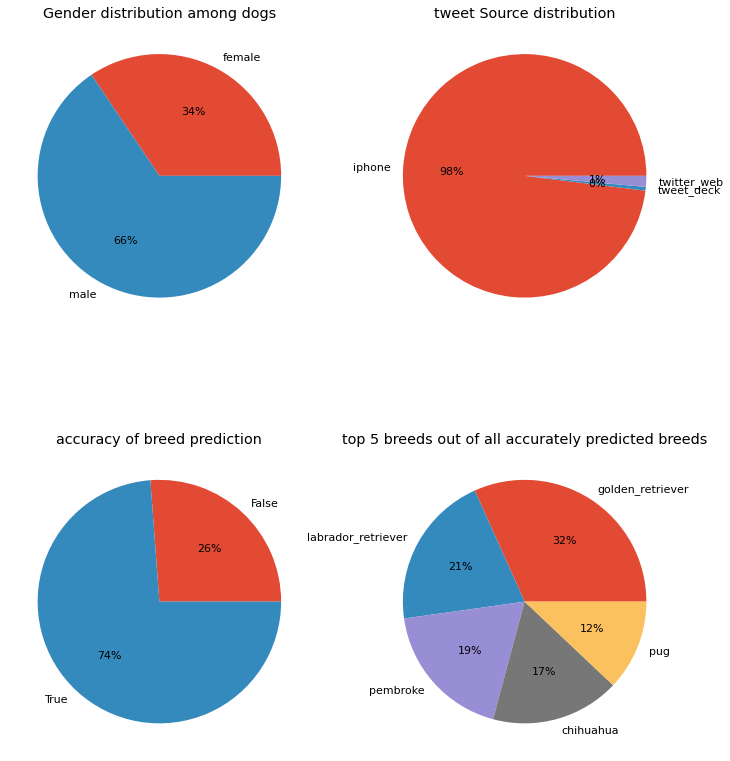

In [84]:

a = df_master_clean.groupby('dog_gender').size()
b = df_master_clean.groupby('sources').size()
c = df_master_clean.groupby('prediction_is_breed').size()
d= df_master_clean[correct_predi].groupby('first_predicted_breed').size().sort_values(ascending = False)[:5]



fig = plt.figure(figsize=(12,50) )
plt.style.use('ggplot')

plt.subplot(5,2,1)
a.plot.pie(autopct='%1.f%%', fontsize=11)
plt.title('Gender distribution among dogs')
plt.ylabel("")

plt.subplot(5,2,2)
b.plot.pie(autopct='%1.f%%', fontsize=11)
plt.title('tweet Source distribution')
plt.ylabel("")

plt.subplot(6,2,3)
c.plot.pie(autopct='%1.f%%', fontsize=11)
plt.title('accuracy of breed prediction')
plt.ylabel("");


plt.subplot(6,2,4)
d.plot.pie(autopct='%1.f%%', fontsize=11)
plt.title('top 5 breeds out of all accurately predicted breeds')
plt.ylabel("");





In [85]:
(df_master_clean.dog_gender.notnull().sum()/df_master_clean.tweet_id.count()).round(3)

0.48

# Insights

1 - Although the gender of only about 48% of all dog tweets could be derived, male dogs are roughly twice as female dogs. 

2 - the source of tweets are mostly iphone.

3 - the machine algorithm had 74% accuracy in predicting the first dog breed.

4 - out of those 74% of accurately predicted dog breeds, most repetetive and famouse ones are Golden Retrievers with 32%   popularity, Labrador Retriever with 21% comes next, followed by Pembroke, Chihuahua and Pug with 19, 17 and 12 percent  popularity respectively. 